In [6]:
import pandas as pd
import numpy as np
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC as SVM
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier as Tree

def plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(12, 8))
    axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap='cool')
    axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap='brg')
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j]
    if model_type == 'tree':
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: raise ValueError('model type not supported')
    Z = Z.reshape(XX.shape)
    Zplot = Z >= 0.5
    axis.pcolormesh(XX, YY, Zplot ,cmap='YlGn')
    axis.contour(XX, YY, Z, alpha=1, colors=["k", "k", "k"], linestyles=["--", "-", "--"],
    levels=[-2, 0, 2])
    plt.show()
np.random.seed(44)
from tensorflow import set_random_seed
set_random_seed(44)


# 1. Small Circle inside Large Circle

# A
A continuación se define la función y se muestra el gráfico correspondiente

In [501]:
def do_circles(n=2000,noisy_n=0.05):
    generator = check_random_state(10)
    linspace = np.linspace(0, 2 * np.pi, n // 2 + 1)[:-1]
    outer_circ_x = np.cos(linspace)
    outer_circ_y = np.sin(linspace)
    inner_circ_x = outer_circ_x * .3
    inner_circ_y = outer_circ_y * .3
    X = np.vstack((np.append(outer_circ_x, inner_circ_x),
    np.append(outer_circ_y, inner_circ_y))).T
    y = np.hstack([np.zeros(n // 2, dtype=np.intp),
    np.ones(n // 2, dtype=np.intp)])
    X += generator.normal(scale=noisy_n, size=X.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.5, random_state=44)
    return X_train,y_train,X_test,y_test
X_train, Y_train, X_test, Y_test = do_circles()

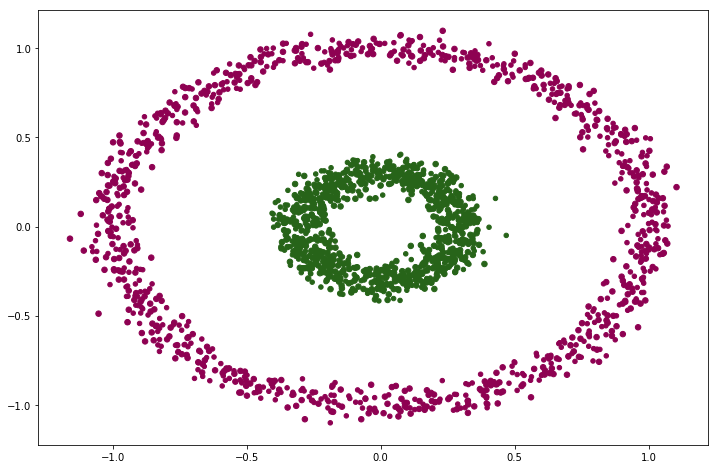

In [502]:
f, axis = plt.subplots(figsize=(12, 8))
axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,cmap='PiYG')
#axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,cmap='bwr')
axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,cmap='PiYG')
plt.show()

# B

In [503]:
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=100, batch_size=50, verbose=1)
scores = model.evaluate(X_test, Y_test)
test_acc = scores[1]
print(test_acc)

/Users/carlos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6951 - acc: 0.5020
Epoch 2/100
1000/1000 [==============================] - 0s 64us/step - loss: 0.6933 - acc: 0.5220
Epoch 3/100
1000/1000 [==============================] - 0s 62us/step - loss: 0.6798 - acc: 0.5540
Epoch 4/100
1000/1000 [==============================] - 0s 63us/step - loss: 0.6363 - acc: 0.6030
Epoch 5/100
1000/1000 [==============================] - 0s 64us/step - loss: 0.5877 - acc: 0.6640
Epoch 6/100
1000/1000 [==============================] - 0s 69us/step - loss: 0.5671 - acc: 0.6850
Epoch 7/100
1000/1000 [==============================] - 0s 67us/step - loss: 0.5581 - acc: 0.6930
Epoch 8/100
1000/1000 [==============================] - 0s 62us/step - loss: 0.5522 - acc: 0.6930
Epoch 9/100
1000/1000 [==============================] - 0s 66us/step - loss: 0.5490 - acc: 0.6910
Epoch 10/100
1000/1000 [==============================] - 0s 63us/step - loss: 0.5464 - acc: 0.6990
Epoch 11/1

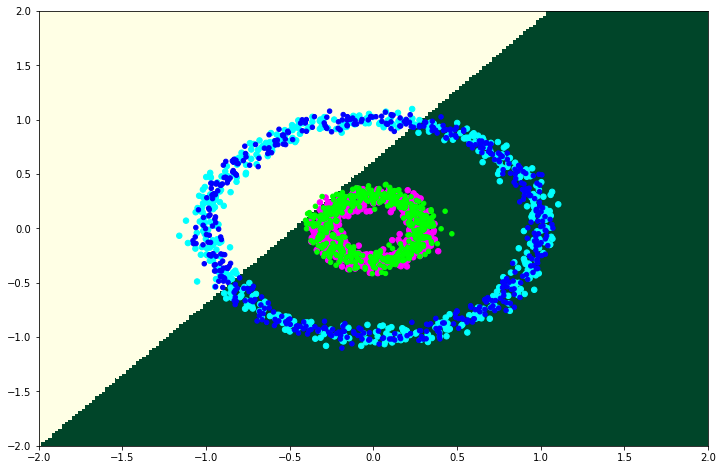

In [504]:
plot_classifier(model,X_train,Y_train,X_test,Y_test,'ann')

Las mejores soluciones obtenidas con una red neuronal de 1 neurona, tienen un score cercano a 0.69 sobre el conjunto de pruebas. Son resultados pésimos, dado que es un clasificador binario. Esto es debido a que con una neurona, solamente corta los datos con una recta, como se aprecia en el gráfico anterior.
Al usar 4 o más neuronas, se tiene un score de 1 para el conjunto de pruebas.

# C

In [505]:
TrainErrors=[]
TestErrors=[]
neuronas=[]
epoch=50
batch=100

In [506]:
n_h=2
model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=epoch, batch_size=batch, verbose=1)
scores = model.evaluate(X_test, Y_test)
test_err = scores[0]
scores = model.evaluate(X_train, Y_train)
train_err = scores[0]
TrainErrors.append(train_err)
TestErrors.append(test_err)
neuronas.append(n_h)



Epoch 1/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6947 - acc: 0.4680
Epoch 2/50
1000/1000 [==============================] - 0s 29us/step - loss: 0.6933 - acc: 0.5190
Epoch 3/50
1000/1000 [==============================] - 0s 34us/step - loss: 0.6933 - acc: 0.4780
Epoch 4/50
1000/1000 [==============================] - 0s 33us/step - loss: 0.6899 - acc: 0.5720
Epoch 5/50
1000/1000 [==============================] - 0s 32us/step - loss: 0.6850 - acc: 0.5420
Epoch 6/50
1000/1000 [==============================] - 0s 36us/step - loss: 0.6733 - acc: 0.5330
Epoch 7/50
1000/1000 [==============================] - 0s 29us/step - loss: 0.6530 - acc: 0.5820
Epoch 8/50
1000/1000 [==============================] - 0s 33us/step - loss: 0.6298 - acc: 0.6280
Epoch 9/50
1000/1000 [==============================] - 0s 32us/step - loss: 0.6079 - acc: 0.6490
Epoch 10/50
1000/1000 [==============================] - 0s 32us/step - loss: 0.5924 - acc: 0.6550
Epoch 11/50
1000/100

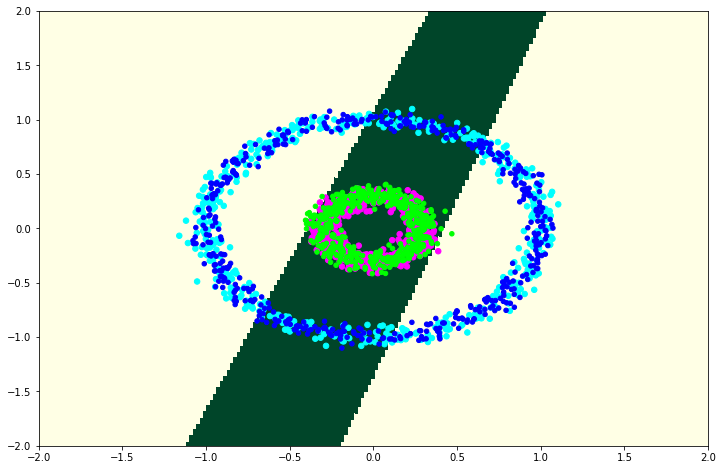

In [507]:
plot_classifier(model,X_train,Y_train,X_test,Y_test,'ann')

In [508]:
n_h=4
model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=epoch, batch_size=batch, verbose=1)
scores = model.evaluate(X_test, Y_test)
test_err = scores[0]
scores = model.evaluate(X_train, Y_train)
train_err = scores[0]
TrainErrors.append(train_err)
TestErrors.append(test_err)
neuronas.append(n_h)

Epoch 1/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6928 - acc: 0.5040
Epoch 2/50
1000/1000 [==============================] - 0s 27us/step - loss: 0.6929 - acc: 0.5060
Epoch 3/50
1000/1000 [==============================] - 0s 35us/step - loss: 0.6900 - acc: 0.5670
Epoch 4/50
1000/1000 [==============================] - 0s 29us/step - loss: 0.6839 - acc: 0.5540
Epoch 5/50
1000/1000 [==============================] - 0s 34us/step - loss: 0.6639 - acc: 0.6130
Epoch 6/50
1000/1000 [==============================] - 0s 33us/step - loss: 0.6258 - acc: 0.7440
Epoch 7/50
1000/1000 [==============================] - 0s 31us/step - loss: 0.5689 - acc: 0.7900
Epoch 8/50
1000/1000 [==============================] - 0s 34us/step - loss: 0.4899 - acc: 0.8840
Epoch 9/50
1000/1000 [==============================] - 0s 28us/step - loss: 0.3997 - acc: 0.9300
Epoch 10/50
1000/1000 [==============================] - 0s 36us/step - loss: 0.3000 - acc: 0.9620
Epoch 11/50
1000/100

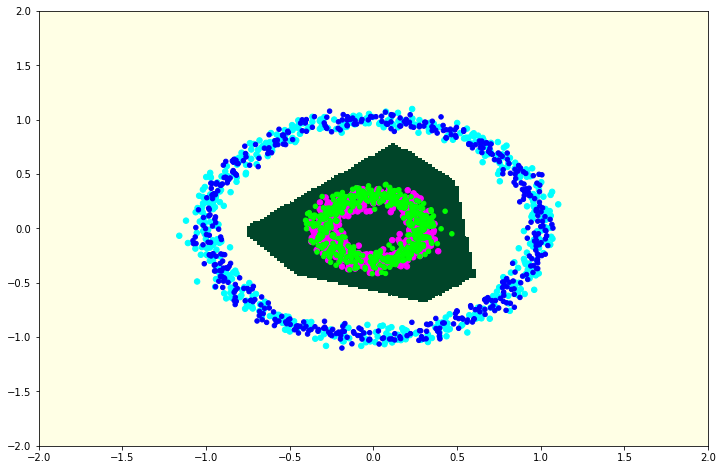

In [509]:
plot_classifier(model,X_train,Y_train,X_test,Y_test,'ann')

In [510]:
n_h=8
model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=epoch, batch_size=batch, verbose=1)
scores = model.evaluate(X_test, Y_test)
test_err = scores[0]
scores = model.evaluate(X_train, Y_train)
train_err = scores[0]
TrainErrors.append(train_err)
TestErrors.append(test_err)
neuronas.append(n_h)

Epoch 1/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6929 - acc: 0.4980
Epoch 2/50
1000/1000 [==============================] - 0s 32us/step - loss: 0.6921 - acc: 0.4920
Epoch 3/50
1000/1000 [==============================] - 0s 37us/step - loss: 0.6882 - acc: 0.5490
Epoch 4/50
1000/1000 [==============================] - 0s 37us/step - loss: 0.6760 - acc: 0.7680
Epoch 5/50
1000/1000 [==============================] - 0s 31us/step - loss: 0.6464 - acc: 0.7170
Epoch 6/50
1000/1000 [==============================] - 0s 37us/step - loss: 0.5872 - acc: 0.8500
Epoch 7/50
1000/1000 [==============================] - 0s 42us/step - loss: 0.4975 - acc: 0.9100
Epoch 8/50
1000/1000 [==============================] - 0s 35us/step - loss: 0.3978 - acc: 0.9450
Epoch 9/50
1000/1000 [==============================] - 0s 37us/step - loss: 0.2999 - acc: 0.9930
Epoch 10/50
1000/1000 [==============================] - 0s 33us/step - loss: 0.2182 - acc: 1.0000
Epoch 11/50
1000/100

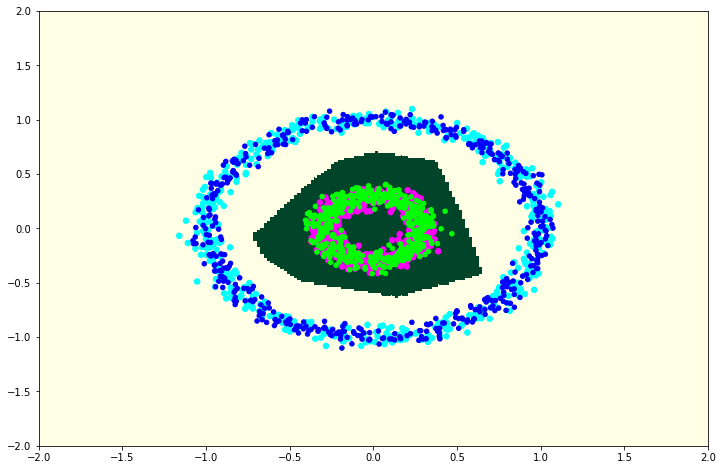

In [511]:
plot_classifier(model,X_train,Y_train,X_test,Y_test,'ann')

In [512]:
n_h=16
model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=epoch, batch_size=batch, verbose=1)
scores = model.evaluate(X_test, Y_test)
test_err = scores[0]
scores = model.evaluate(X_train, Y_train)
train_err = scores[0]
TrainErrors.append(train_err)
TestErrors.append(test_err)
neuronas.append(n_h)

Epoch 1/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6929 - acc: 0.5060
Epoch 2/50
1000/1000 [==============================] - 0s 31us/step - loss: 0.6912 - acc: 0.4820
Epoch 3/50
1000/1000 [==============================] - 0s 35us/step - loss: 0.6826 - acc: 0.6060
Epoch 4/50
1000/1000 [==============================] - 0s 29us/step - loss: 0.6645 - acc: 0.6840
Epoch 5/50
1000/1000 [==============================] - 0s 29us/step - loss: 0.6160 - acc: 0.8210
Epoch 6/50
1000/1000 [==============================] - 0s 33us/step - loss: 0.5269 - acc: 0.9930
Epoch 7/50
1000/1000 [==============================] - 0s 28us/step - loss: 0.4138 - acc: 0.9950
Epoch 8/50
1000/1000 [==============================] - 0s 34us/step - loss: 0.2988 - acc: 1.0000
Epoch 9/50
1000/1000 [==============================] - 0s 31us/step - loss: 0.2112 - acc: 1.0000
Epoch 10/50
1000/1000 [==============================] - ETA: 0s - loss: 0.1807 - acc: 1.000 - 0s 29us/step - loss: 0.1

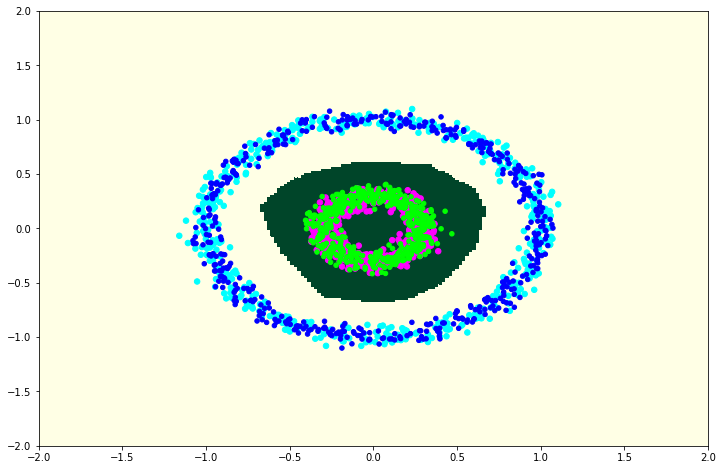

In [513]:
plot_classifier(model,X_train,Y_train,X_test,Y_test,'ann')

In [514]:
n_h=32
model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=epoch, batch_size=batch, verbose=1)
scores = model.evaluate(X_test, Y_test)
test_err = scores[0]
scores = model.evaluate(X_train, Y_train)
train_err = scores[0]
TrainErrors.append(train_err)
TestErrors.append(test_err)
neuronas.append(n_h)

Epoch 1/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6925 - acc: 0.5480
Epoch 2/50
1000/1000 [==============================] - 0s 31us/step - loss: 0.6877 - acc: 0.6130
Epoch 3/50
1000/1000 [==============================] - 0s 39us/step - loss: 0.6741 - acc: 0.8060
Epoch 4/50
1000/1000 [==============================] - 0s 37us/step - loss: 0.6416 - acc: 0.7660
Epoch 5/50
1000/1000 [==============================] - 0s 37us/step - loss: 0.5685 - acc: 0.9960
Epoch 6/50
1000/1000 [==============================] - 0s 37us/step - loss: 0.4562 - acc: 0.9990
Epoch 7/50
1000/1000 [==============================] - 0s 36us/step - loss: 0.3327 - acc: 1.0000
Epoch 8/50
1000/1000 [==============================] - 0s 34us/step - loss: 0.2340 - acc: 1.0000
Epoch 9/50
1000/1000 [==============================] - 0s 34us/step - loss: 0.1669 - acc: 1.0000
Epoch 10/50
1000/1000 [==============================] - 0s 32us/step - loss: 0.1228 - acc: 1.0000
Epoch 11/50
1000/100

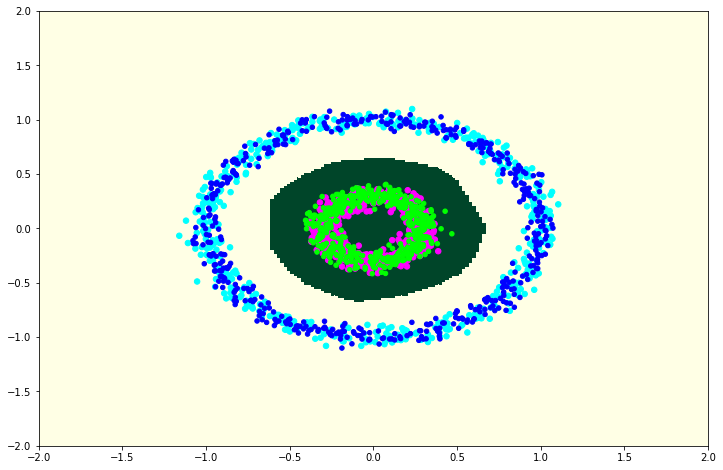

In [515]:
plot_classifier(model,X_train,Y_train,X_test,Y_test,'ann')

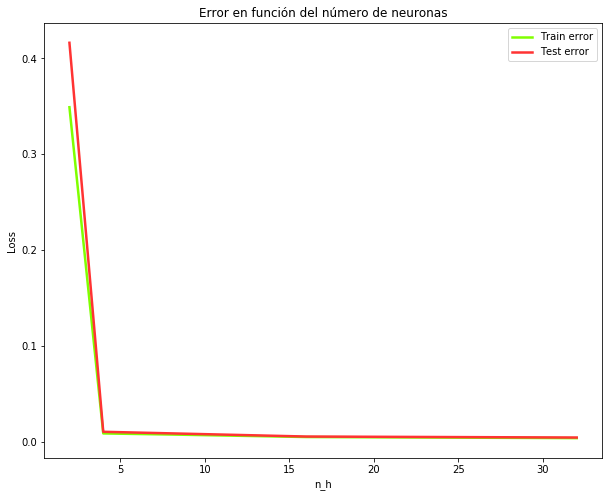

In [516]:
plt.figure(figsize=(10, 8))
plt.xlabel("n_h")
plt.ylabel("Loss")
plt.title("Error en función del número de neuronas")
plt.plot(neuronas, TrainErrors, lw=2.5, color=(0.5,1,0), label='Train error')
plt.plot(neuronas, TestErrors, lw=2.5, color=(1,0.2,0.2), label='Test error')
plt.legend()
plt.show()

El modelo alcanza el mínimo de error con 4 neuronas, luego converge.

# D

Test Accuracy = 0.677000
1


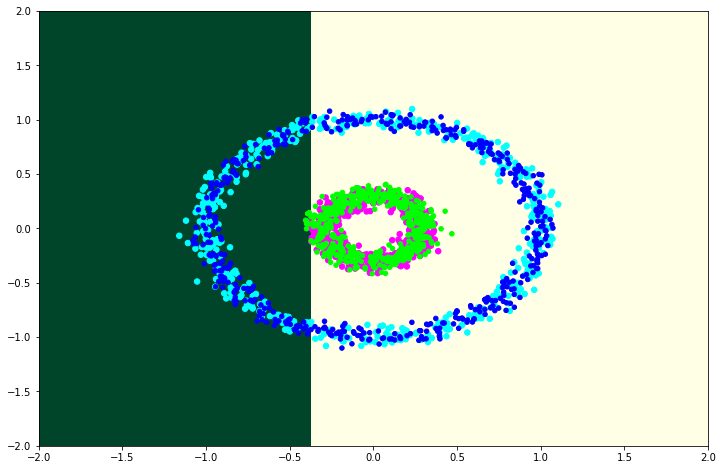

In [517]:
clf=Tree(criterion='gini',splitter='best',random_state=44,max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print ("Test Accuracy = %f"%acc_test)
print (clf.tree_.max_depth)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

Debido a que el árbol de 1 solo nodo, divide los datos de manera lineal. No puede lograr separar los datos correctamente, teniendo un accuracy de solo 0.677.

# E

Test Accuracy = 0.869000
Profundidad  2  gini+best


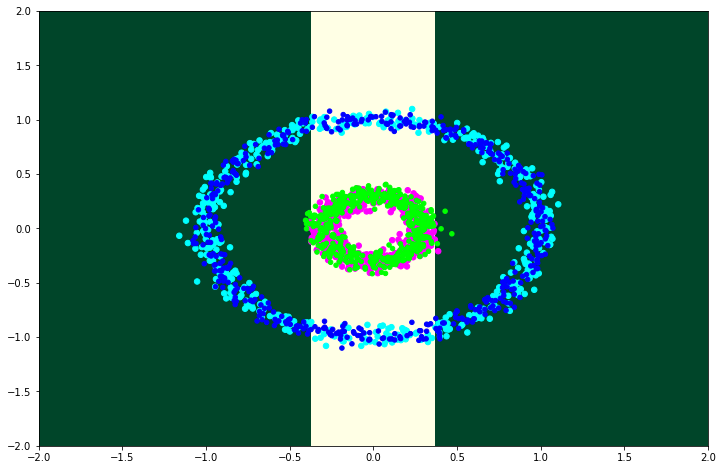

In [518]:
n_t=2
clf=Tree(criterion='gini',splitter='best',random_state=44,max_depth=n_t)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print ("Test Accuracy = %f"%acc_test)
print ("Profundidad ",clf.tree_.max_depth," gini+best")
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')


Test Accuracy = 0.930000
Profundidad  3  gini+best


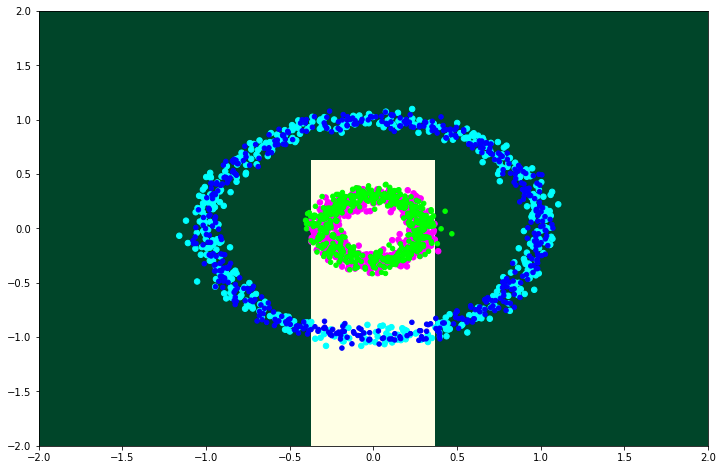

In [519]:
n_t=3
clf=Tree(criterion='gini',splitter='best',random_state=44,max_depth=n_t)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print ("Test Accuracy = %f"%acc_test)
print ("Profundidad ",clf.tree_.max_depth," gini+best")
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

Test Accuracy = 0.991000
Profundidad  4  gini+best


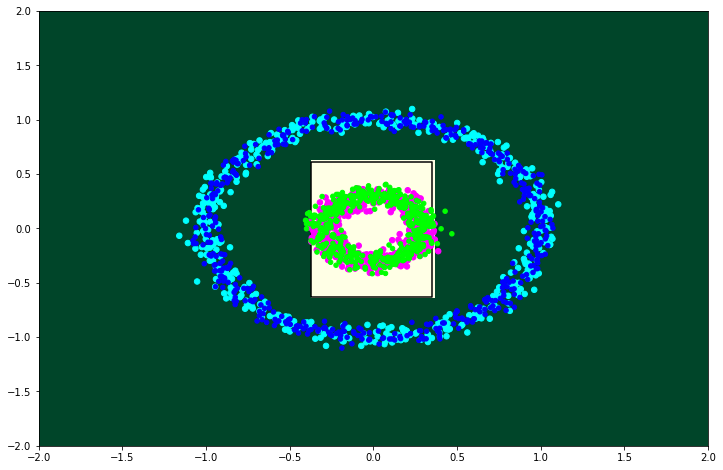

In [520]:
n_t=4
clf=Tree(criterion='gini',splitter='best',random_state=44,max_depth=n_t)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print ("Test Accuracy = %f"%acc_test)
print ("Profundidad ",clf.tree_.max_depth," gini+best")
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

Test Accuracy = 0.744000
Profundidad  2  gini+random


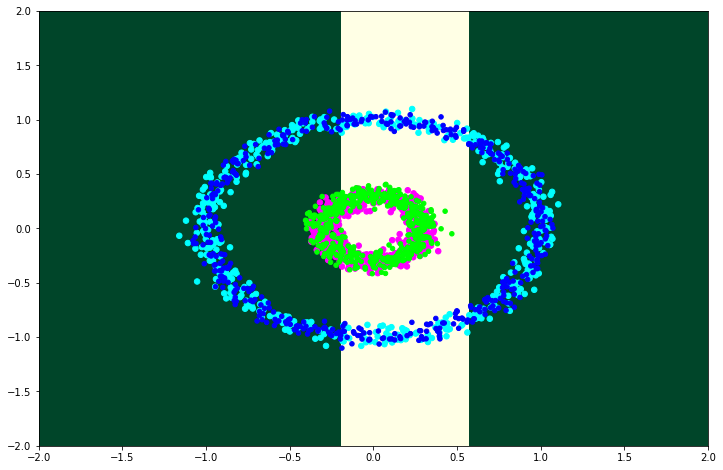

In [521]:
n_t=2
clf=Tree(criterion='gini',splitter='random',random_state=44,max_depth=n_t)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print ("Test Accuracy = %f"%acc_test)
print ("Profundidad ",clf.tree_.max_depth," gini+random")
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

Test Accuracy = 0.968000
Profundidad  5  gini+random


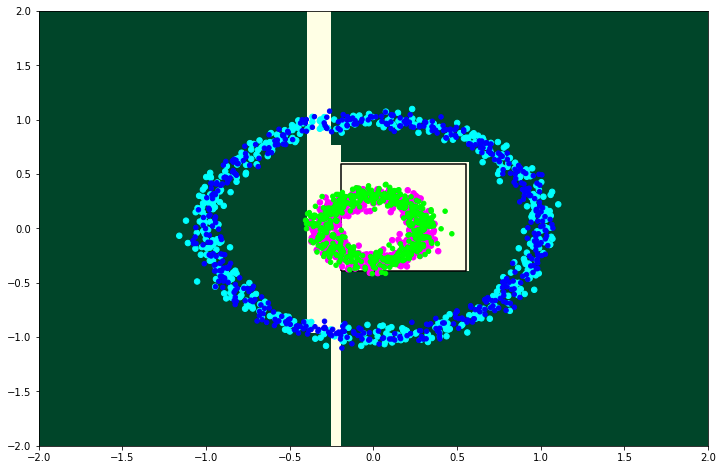

In [522]:
n_t=5
clf=Tree(criterion='gini',splitter='random',random_state=44,max_depth=n_t)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print ("Test Accuracy = %f"%acc_test)
print ("Profundidad ",clf.tree_.max_depth," gini+random")
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

Test Accuracy = 0.993000
Profundidad  9  gini+random


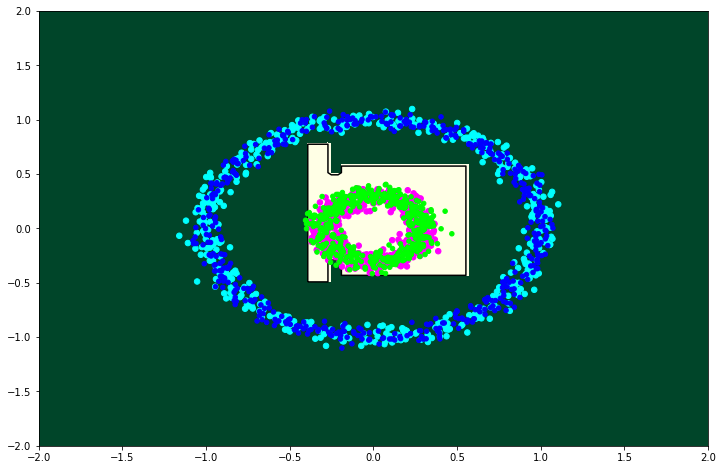

In [523]:
n_t=9
clf=Tree(criterion='gini',splitter='random',random_state=44,max_depth=n_t)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print ("Test Accuracy = %f"%acc_test)
print ("Profundidad ",clf.tree_.max_depth," gini+random")
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

In [524]:
trainErrors=[]
testErrors=[]
depth=[]
for i in range(2,21):
    clf=Tree(criterion='gini',splitter='best',random_state=44,max_depth=i)
    clf.fit(X_train,Y_train)
    testErrors.append(1-clf.score(X_test,Y_test))
    trainErrors.append(1-clf.score(X_train,Y_train))
    depth.append(i)

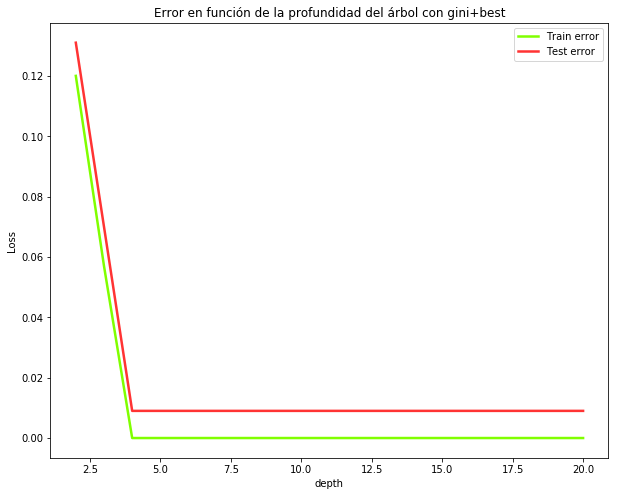

In [525]:
plt.figure(figsize=(10, 8))
plt.xlabel("depth")
plt.ylabel("Loss")
plt.title("Error en función de la profundidad del árbol con gini+best")
plt.plot(depth, trainErrors, lw=2.5, color=(0.5,1,0), label='Train error')
plt.plot(depth, testErrors, lw=2.5, color=(1,0.2,0.2), label='Test error')
plt.legend()
plt.show()

In [526]:
trainErrors=[]
testErrors=[]
depth=[]
for i in range(2,21):
    clf=Tree(criterion='gini',splitter='random',random_state=44,max_depth=i)
    clf.fit(X_train,Y_train)
    testErrors.append(1-clf.score(X_test,Y_test))
    trainErrors.append(1-clf.score(X_train,Y_train))
    depth.append(i)

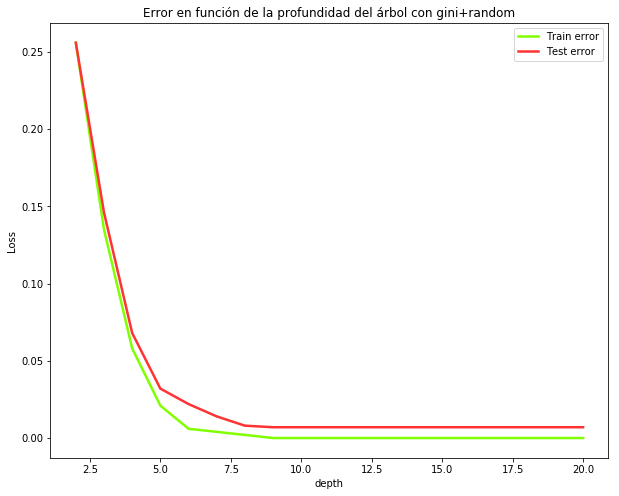

In [527]:
plt.figure(figsize=(10, 8))
plt.xlabel("depth")
plt.ylabel("Loss")
plt.title("Error en función de la profundidad del árbol con gini+random")
plt.plot(depth, trainErrors, lw=2.5, color=(0.5,1,0), label='Train error')
plt.plot(depth, testErrors, lw=2.5, color=(1,0.2,0.2), label='Test error')
plt.legend()
plt.show()

# F

In [528]:
kpca = KernelPCA(n_components=2,kernel="rbf", gamma=5)
kpca = kpca.fit(X_train)
Xkpca_train = kpca.transform(X_train)
Xkpca_test = kpca.transform(X_test)

# G

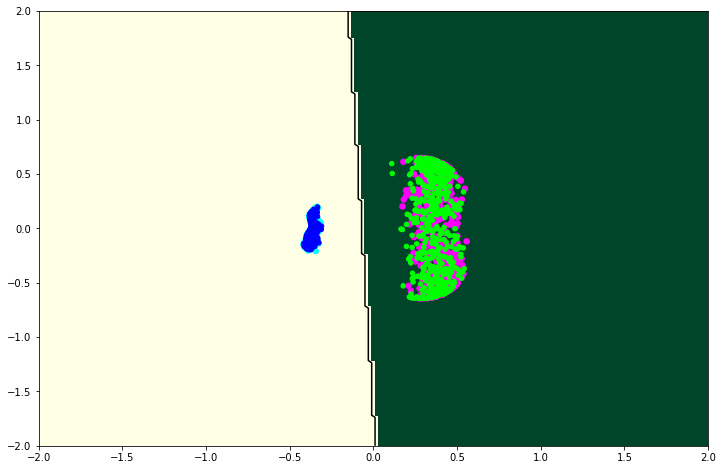

In [529]:
model= SVM()
model.set_params(kernel='linear')
model.fit(Xkpca_train,Y_train)
#pcaModels.append(model)
#yPredictSVM=model.predict(Xkpca_test)
plot_classifier(model,Xkpca_train,Y_train,Xkpca_test,Y_test,'ann')

# 3 Calidad de un Vino
# A

In [8]:
df_red = pd.read_csv("winequality/winequality-red.csv",sep=";")
df_red['type']=1
df_white = pd.read_csv("winequality/winequality-white.csv",sep=";")
df_white['type']=0
df = pd.concat([df_red,df_white], axis=0)

In [9]:
df.shape

(6497, 13)

In [10]:
df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


# B

In [12]:
df['good_quality'] = [1 if q>5 else 0 for q in df.quality]
x=df.drop(['quality','good_quality'],axis=1)
y=df['good_quality']

In [13]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0


In [14]:
df['good_quality'].value_counts()

1    4113
0    2384
Name: good_quality, dtype: int64

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=44)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(xtrain)
xtrainScaled=scaler.transform(xtrain)
xtestScaled=scaler.transform(xtest)

# C

### gini+best

In [17]:
trainF1=[]
testF1=[]
depth=[]
bestScore=0
bestDepth=0
for i in range(1,100):
    clf=Tree(criterion='gini',splitter='best',random_state=44,max_depth=i)
    clf.fit(xtrain,ytrain)
    ytrain_predict=clf.predict(xtrain)
    ytest_predict=clf.predict(xtest)
    f1scoreTest=f1_score(ytest,ytest_predict)
    testF1.append(f1scoreTest)
    if(f1scoreTest>bestScore):
        bestScore=f1scoreTest
        bestDepth=i
    trainF1.append(f1_score(ytrain,ytrain_predict))
    depth.append(i)
print("Best score: ",bestScore)
print("Depth: ",bestDepth)

Best score:  0.817782120176
Depth:  21


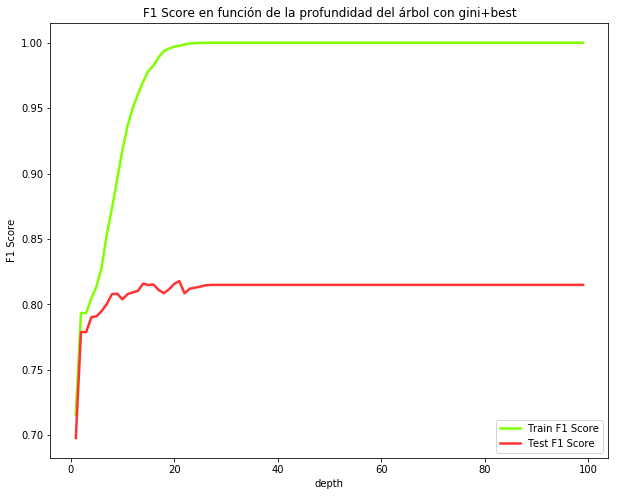

In [539]:
plt.figure(figsize=(10, 8))
plt.xlabel("depth")
plt.ylabel("F1 Score")
plt.title("F1 Score en función de la profundidad del árbol con gini+best")
plt.plot(depth, trainF1, lw=2.5, color=(0.5,1,0), label='Train F1 Score')
plt.plot(depth, testF1, lw=2.5, color=(1,0.2,0.2), label='Test F1 Score')
plt.legend()
plt.show()

### gini+random

In [18]:
from sklearn.metrics import classification_report
trainF1=[]
testF1=[]
depth=[]
bestScore=0
bestDepth=0
for i in range(1,100):
    clf=Tree(criterion='gini',splitter='random',random_state=44,max_depth=i)
    clf.fit(xtrain,ytrain)
    ytrain_predict=clf.predict(xtrain)
    ytest_predict=clf.predict(xtest)
    f1scoreTest=f1_score(ytest,ytest_predict)
    testF1.append(f1scoreTest)
    if(f1scoreTest>bestScore):
        bestScore=f1scoreTest
        bestDepth=i
    trainF1.append(f1_score(ytrain,ytrain_predict))
    depth.append(i)
    classification_report(ytest,ytest_predict)
print("Best score: ",bestScore)
print("Depth: ",bestDepth)


             precision    recall  f1-score   support

          0       0.72      0.68      0.70       610
          1       0.81      0.84      0.83      1015

avg / total       0.78      0.78      0.78      1625

Best score:  0.828019323671
Depth:  24


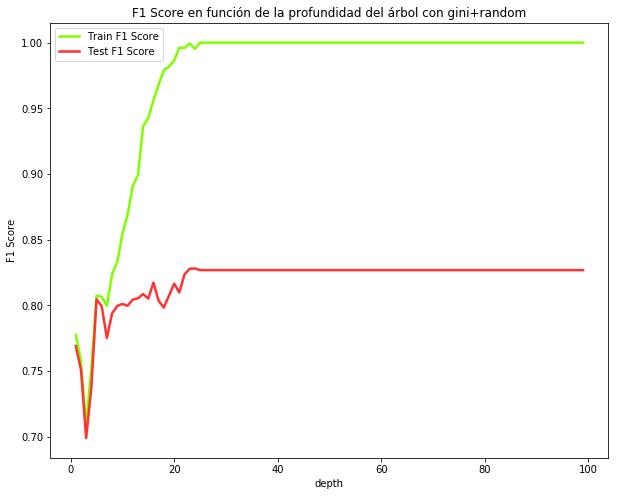

In [541]:
plt.figure(figsize=(10, 8))
plt.xlabel("depth")
plt.ylabel("F1 Score")
plt.title("F1 Score en función de la profundidad del árbol con gini+random")
plt.plot(depth, trainF1, lw=2.5, color=(0.5,1,0), label='Train F1 Score')
plt.plot(depth, testF1, lw=2.5, color=(1,0.2,0.2), label='Test F1 Score')
plt.legend()
plt.show()

### entropy+best

In [542]:
trainF1=[]
testF1=[]
depth=[]
bestScore=0
bestDepth=0
for i in range(1,100):
    clf=Tree(criterion='entropy',splitter='best',random_state=44,max_depth=i)
    clf.fit(xtrain,ytrain)
    ytrain_predict=clf.predict(xtrain)
    ytest_predict=clf.predict(xtest)
    f1scoreTest=f1_score(ytest,ytest_predict)
    testF1.append(f1scoreTest)
    if(f1scoreTest>bestScore):
        bestScore=f1scoreTest
        bestDepth=i
    trainF1.append(f1_score(ytrain,ytrain_predict))
    depth.append(i)
print("Best score: ",bestScore)
print("Depth: ",bestDepth)

Best score:  0.813942071674
Depth:  24


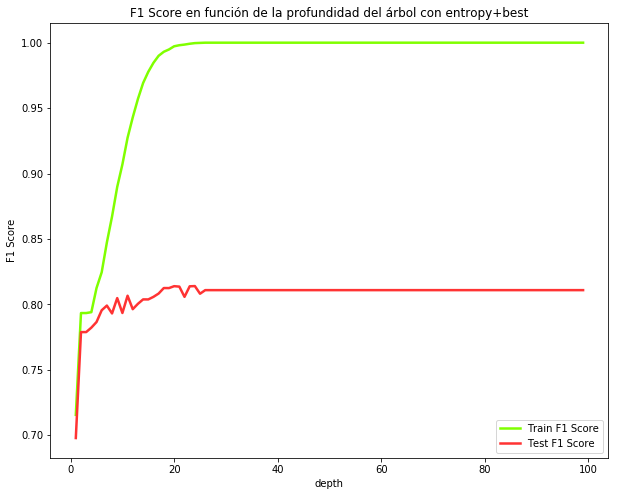

In [543]:
plt.figure(figsize=(10, 8))
plt.xlabel("depth")
plt.ylabel("F1 Score")
plt.title("F1 Score en función de la profundidad del árbol con entropy+best")
plt.plot(depth, trainF1, lw=2.5, color=(0.5,1,0), label='Train F1 Score')
plt.plot(depth, testF1, lw=2.5, color=(1,0.2,0.2), label='Test F1 Score')
plt.legend()
plt.show()

### entropy+random

In [544]:
trainF1=[]
testF1=[]
depth=[]
bestScore=0
bestDepth=0
for i in range(1,100):
    clf=Tree(criterion='entropy',splitter='random',random_state=44,max_depth=i)
    clf.fit(xtrain,ytrain)
    ytrain_predict=clf.predict(xtrain)
    ytest_predict=clf.predict(xtest)
    f1scoreTest=f1_score(ytest,ytest_predict)
    testF1.append(f1scoreTest)
    if(f1scoreTest>bestScore):
        bestScore=f1scoreTest
        bestDepth=i
    trainF1.append(f1_score(ytrain,ytrain_predict))
    depth.append(i)
print("Best score: ",bestScore)
print("Depth: ",bestDepth)

Best score:  0.825412221145
Depth:  28


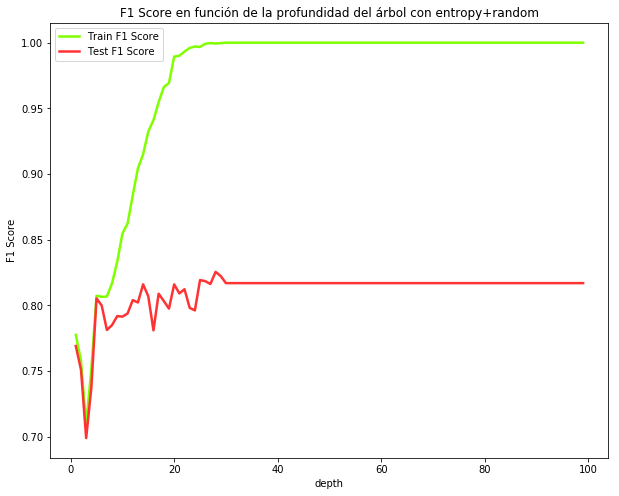

In [545]:
plt.figure(figsize=(10, 8))
plt.xlabel("depth")
plt.ylabel("F1 Score")
plt.title("F1 Score en función de la profundidad del árbol con entropy+random")
plt.plot(depth, trainF1, lw=2.5, color=(0.5,1,0), label='Train F1 Score')
plt.plot(depth, testF1, lw=2.5, color=(1,0.2,0.2), label='Test F1 Score')
plt.legend()
plt.show()

# D

In [30]:
trainF1=[]
testF1=[]
nEst=[]
bestScore=0
bestEst=0
for i in range(1,100):
    clf=RandomForestClassifier(criterion='gini',n_estimators=i,n_jobs=-1,random_state=44)
    clf.fit(xtrain,ytrain)
    ytrain_predict=clf.predict(xtrain)
    ytest_predict=clf.predict(xtest)
    f1scoreTest=f1_score(ytest,ytest_predict)
    testF1.append(f1scoreTest)
    if(f1scoreTest>bestScore):
        bestScore=f1scoreTest
        bestEst=i
    trainF1.append(f1_score(ytrain,ytrain_predict))
    nEst.append(i)
print("Best score: ",bestScore)
print("Best Number of Estimators: ",bestEst)

Best score:  0.872553699284
Best Number of Estimators:  59


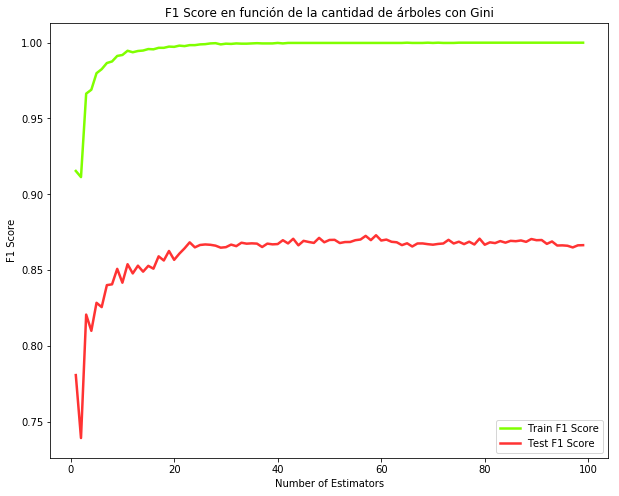

In [571]:
plt.figure(figsize=(10, 8))
plt.xlabel("Number of Estimators")
plt.ylabel("F1 Score")
plt.title("F1 Score en función de la cantidad de árboles con Gini")
plt.plot(nEst, trainF1, lw=2.5, color=(0.5,1,0), label='Train F1 Score')
plt.plot(nEst, testF1, lw=2.5, color=(1,0.2,0.2), label='Test F1 Score')
plt.legend()
plt.show()

In [568]:
trainF1=[]
testF1=[]
nEst=[]
bestScore=0
bestEst=0
for i in range(1,100):
    clf=RandomForestClassifier(criterion='entropy',n_estimators=i,n_jobs=-1,random_state=44)
    clf.fit(xtrain,ytrain)
    ytrain_predict=clf.predict(xtrain)
    ytest_predict=clf.predict(xtest)
    f1scoreTest=f1_score(ytest,ytest_predict)
    testF1.append(f1scoreTest)
    if(f1scoreTest>bestScore):
        bestScore=f1scoreTest
        bestEst=i
    trainF1.append(f1_score(ytrain,ytrain_predict))
    nEst.append(i)
print("Best score: ",bestScore)
print("Best Number of Estimators: ",bestEst)

Best score:  0.875540605478
Best Number of Estimators:  55


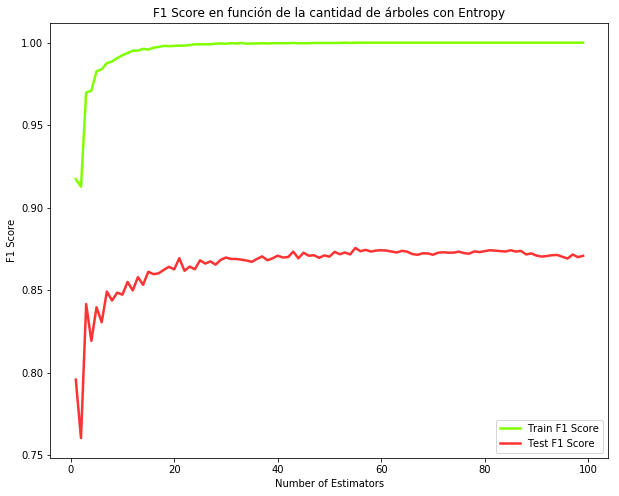

In [569]:
plt.figure(figsize=(10, 8))
plt.xlabel("Number of Estimators")
plt.ylabel("F1 Score")
plt.title("F1 Score en función de la cantidad de árboles con Entropy")
plt.plot(nEst, trainF1, lw=2.5, color=(0.5,1,0), label='Train F1 Score')
plt.plot(nEst, testF1, lw=2.5, color=(1,0.2,0.2), label='Test F1 Score')
plt.legend()
plt.show()

# E

Con el siguiente código se verifica que profundidad da mejores resultados para distintas cantidades de estimadores.

In [632]:
bestScore=0
bestEstimator=0
bestDepth=0
#print("estimator     depth     f1score")
for estimator in range(10,30):
    bestDepthScore=0
    bestDepthEst=0
    for depth in range(10,40):
        clf=AdaBoostClassifier(base_estimator=Tree(criterion='gini',splitter='best',max_depth=depth), n_estimators=estimator,random_state=44)
        clf.fit(xtrain,ytrain)
        ytrain_predict=clf.predict(xtrain)
        ytest_predict=clf.predict(xtest)
        f1scoreTest=f1_score(ytest,ytest_predict)
        #print(estimator,"          ",depth,"          ",f1scoreTest)
        if(f1scoreTest>bestScore):
            bestScore=f1scoreTest
            bestDepth=depth
            bestEstimator=estimator
        if(f1scoreTest>bestDepthScore):
            bestDepthScore=f1scoreTest
            bestDepthEst=depth
            
    print("Number of Estimators: ",estimator)
    print("Best score: ",bestDepthScore)
    print("Best depth: ",bestDepthEst)
    print()
print()
print("Best Score: ",bestScore)
print("Depth: ",bestDepth)
print("Number of Estimators ",bestEstimator)


        


Estimators:  10
Best score:  0.85482330468
Best depth:  23

Estimators:  11
Best score:  0.855231724797
Best depth:  23

Estimators:  12
Best score:  0.859741503112
Best depth:  23

Estimators:  13
Best score:  0.862895493768
Best depth:  23

Estimators:  14
Best score:  0.857965451056
Best depth:  23

Estimators:  15
Best score:  0.859598853868
Best depth:  23

Estimators:  16
Best score:  0.857826711345
Best depth:  18

Estimators:  17
Best score:  0.858104858105
Best depth:  18

Estimators:  18
Best score:  0.858508604207
Best depth:  23

Estimators:  19
Best score:  0.857690464782
Best depth:  18

Estimators:  20
Best score:  0.860009555662
Best depth:  19

Estimators:  21
Best score:  0.861804222649
Best depth:  16

Estimators:  22
Best score:  0.861920688008
Best depth:  17

Estimators:  23
Best score:  0.864553314121
Best depth:  23

Estimators:  24
Best score:  0.867052023121
Best depth:  23

Estimators:  25
Best score:  0.864244741874
Best depth:  17

Estimators:  26
Best scor

Se observa que en general las profunidades máximas que dan mejores resultados son 23 y 17 , por lo cual se trabajará con dichas profundidades.

In [634]:
trainF1=[]
testF1=[]
nEst=[]
bestScore=0
bestEst=0
for i in range(1,100):
    clf=AdaBoostClassifier(base_estimator=Tree(criterion='gini',splitter='best',max_depth=23), n_estimators=i,random_state=44)
    clf.fit(xtrain,ytrain)
    ytrain_predict=clf.predict(xtrain)
    ytest_predict=clf.predict(xtest)
    f1scoreTest=f1_score(ytest,ytest_predict)
    testF1.append(f1scoreTest)
    if(f1scoreTest>bestScore):
        bestScore=f1scoreTest
        bestEst=i
    trainF1.append(f1_score(ytrain,ytrain_predict))
    nEst.append(i)
print("Best score: ",bestScore)
print("Best Number of Estimators: ",bestEst)


Best score:  0.869565217391
Best Number of Estimators:  76


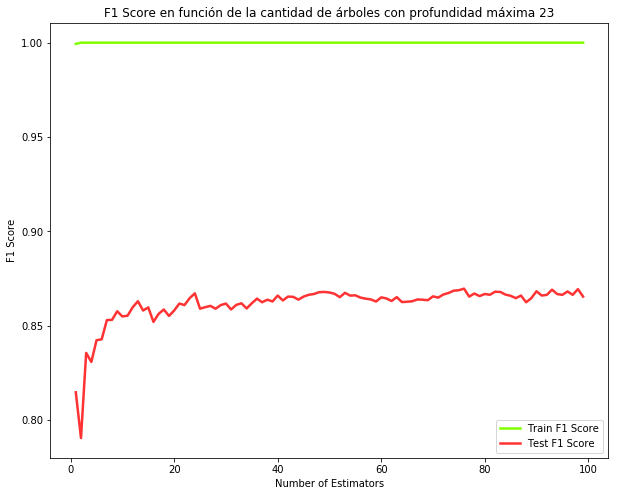

In [636]:
plt.figure(figsize=(10, 8))
plt.xlabel("Number of Estimators")
plt.ylabel("F1 Score")
plt.title("F1 Score en función de la cantidad de árboles con profundidad máxima 23")
plt.plot(nEst, trainF1, lw=2.5, color=(0.5,1,0), label='Train F1 Score')
plt.plot(nEst, testF1, lw=2.5, color=(1,0.2,0.2), label='Test F1 Score')
plt.legend()
plt.show()

In [637]:
trainF1=[]
testF1=[]
nEst=[]
bestScore=0
bestEst=0
for i in range(1,100):
    clf=AdaBoostClassifier(base_estimator=Tree(criterion='gini',splitter='best',max_depth=17), n_estimators=i,random_state=44)
    clf.fit(xtrain,ytrain)
    ytrain_predict=clf.predict(xtrain)
    ytest_predict=clf.predict(xtest)
    f1scoreTest=f1_score(ytest,ytest_predict)
    testF1.append(f1scoreTest)
    if(f1scoreTest>bestScore):
        bestScore=f1scoreTest
        bestEst=i
    trainF1.append(f1_score(ytrain,ytrain_predict))
    nEst.append(i)
print("Best score: ",bestScore)
print("Best Number of Estimators: ",bestEst)


Best score:  0.877326968974
Best Number of Estimators:  87


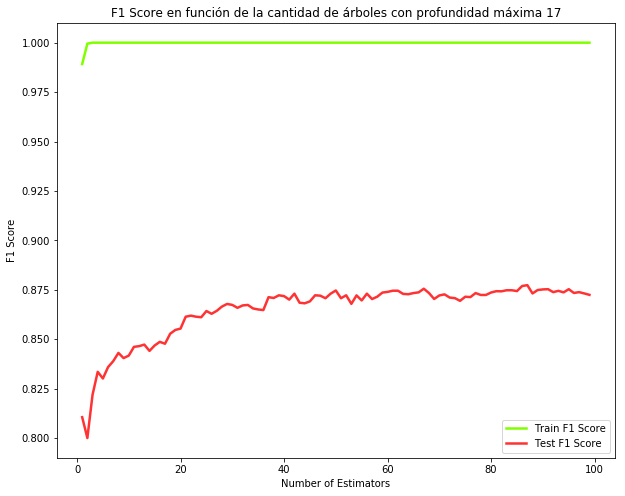

In [638]:
plt.figure(figsize=(10, 8))
plt.xlabel("Number of Estimators")
plt.ylabel("F1 Score")
plt.title("F1 Score en función de la cantidad de árboles con profundidad máxima 17")
plt.plot(nEst, trainF1, lw=2.5, color=(0.5,1,0), label='Train F1 Score')
plt.plot(nEst, testF1, lw=2.5, color=(1,0.2,0.2), label='Test F1 Score')
plt.legend()
plt.show()

In [15]:
from sklearn.neural_network import MLPClassifier
bestScore=0
bestConfig=(q,w)
for q in range (1,10):
    for w in range (1,5):
        mlp=MLPClassifier(hidden_layer_sizes=(12,w,e,1),random_state=44)
        mlp.fit(xtrainScaled,ytrain)
        ytest_predict=mlp.predict(xtestScaled)
        score=f1_score(ytest,ytest_predict)
        if(score>bestScore):
            bestScore=score
            bestConfig=(q,w)
print(bestScore)
print(bestConfig)

0.817131857555
(1, 4)
